# 21.店舗を絞り込んで可視化できるようにしてみよう

In [1]:
!pip3 install ipywidgets

  Using cached https://files.pythonhosted.org/packages/6b/bb/285066ddd710779cb69f03d42fa72fbfe4352b4895eb6abab551eae1535a/ipywidgets-7.6.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/c8/2a8a5cb1afdecfa92c000e3a5d63a9fdd1b7fe77570f65536b3f05a05f14/ipykernel-6.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/4d/22a93473bca99c80f2d23f867ebbfee2f6c8e186bf678864eec641500910/jupyterlab_widgets-1.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/38/4c/466298b114eea62f300dbef98cc2c33c6cbc439f1f71bc199c674ae23c2c/traitlets-5.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/c7/dd50978c637a7af8234909277c4e7ec1b71310c13fb3135f3c8f5b6e045f/nbformat-5.1.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/

In [2]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')

order_data = pd.read_csv('tbl_order_202004.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# 名称
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払い済み'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済み'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払い済み
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済み
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済み
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済み
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済み


In [3]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(index=3, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
157,2531743,4,C92443692,67,85022159,2020-04-01 11:13:13,2020-04-01 11:57:13,0,2064,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
380,39064833,4,C20047719,76,35781015,2020-04-01 11:32:32,2020-04-01 11:48:32,1,698,1,北千住店,TK,東京,東京,お持ち帰り,お支払い済み
479,86916169,4,C15610670,79,90260649,2020-04-01 11:39:39,2020-04-01 12:26:39,0,3530,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
671,42261602,4,C71523997,15,49883144,2020-04-01 11:56:56,2020-04-01 12:13:56,0,3901,2,北千住店,TK,東京,東京,デリバリー,お渡し済み
734,48703173,4,C57515212,99,77446444,2020-04-01 12:02:02,2020-04-01 12:12:02,1,4692,1,北千住店,TK,東京,東京,お持ち帰り,お支払い済み


Dropdown(index=5, options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', …

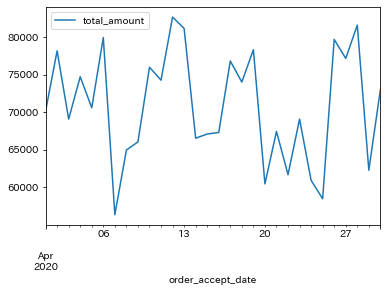

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

# 22.複数店舗の詳細を可視化できるようにしてみよう

In [5]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'] .isin(val['new'])) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
select = SelectMultiple(options = store_list)
select.observe(order_by_multi, names='value')
display(select)


SelectMultiple(index=(1, 2), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
38,84034264,2,C80963257,14,77682610,2020-04-01 11:03:03,2020-04-01 11:26:03,0,2154,2,あきる野店,TK,東京,東京,デリバリー,お渡し済み
127,39369894,3,C19472009,99,6635308,2020-04-01 11:10:10,2020-04-01 12:08:10,0,2987,2,足立店,TK,東京,東京,デリバリー,お渡し済み
271,45262722,3,C88136991,66,12174928,2020-04-01 11:22:22,2020-04-01 12:11:22,0,2732,2,足立店,TK,東京,東京,デリバリー,お渡し済み
451,2272387,3,C34489272,1,47221468,2020-04-01 11:37:37,2020-04-01 12:22:37,0,3234,2,足立店,TK,東京,東京,デリバリー,お渡し済み
678,50000478,2,C63288793,30,91377121,2020-04-01 11:57:57,2020-04-01 12:29:57,1,1900,1,あきる野店,TK,東京,東京,お持ち帰り,お支払い済み


SelectMultiple(index=(1, 2), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店…

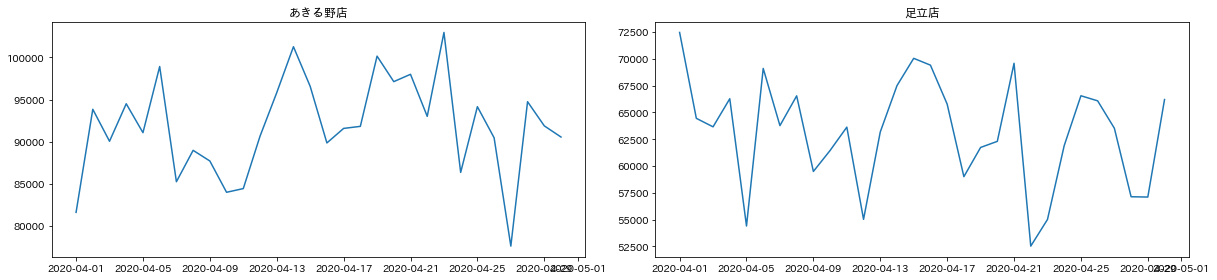

In [6]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17, 4))
    
    
    i = 0
    
    for trg in val['new']:
        pick_data = order_data.loc[(order_data['store_name'] == trg) & (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax  = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
        fig.tight_layout()
        
select2 = SelectMultiple(options = store_list)
select2.observe(graph_by_multi, names='value')
display(select2)

# 23.スライドバーを用いてオーダー件数を調べてみよう

In [7]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='件数：')
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1100, description='件数：', max=2000, min=1000, step=100)

store_name
さいたま緑店    1021
亀有店       1035
佐倉店        879
六本木店       998
前橋店        821
          ... 
都筑店       1009
銀座店        967
鎌倉店        976
駒沢店       1001
高田馬場店     1065
Length: 66, dtype: int64


In [8]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() > val['new']])
    
slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='件数：')
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1600, description='件数：', max=2000, min=1000, step=100)

# 24.トグルボタンで地域データを抽出しよう

In [9]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(index=3, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='埼玉')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
10,5734749,179,C83670320,35,84618787,2020-04-01 11:00:00,2020-04-01 11:35:00,0,3319,2,和光店,SA,埼玉,埼玉,デリバリー,お渡し済み
32,28698586,179,C60563867,7,2400310,2020-04-01 11:02:02,2020-04-01 11:19:02,0,2308,2,和光店,SA,埼玉,埼玉,デリバリー,お渡し済み
60,96590586,159,C48324617,27,8126998,2020-04-01 11:05:05,2020-04-01 11:31:05,0,3319,2,久喜店,SA,埼玉,埼玉,デリバリー,お渡し済み
65,41892174,162,C46613710,9,55096054,2020-04-01 11:05:05,2020-04-01 12:27:05,0,2987,2,越谷店,SA,埼玉,埼玉,デリバリー,お渡し済み
69,57018266,177,C85121147,21,29734816,2020-04-01 11:05:05,2020-04-01 11:33:05,0,3190,2,本庄店,SA,埼玉,埼玉,デリバリー,お渡し済み


ToggleButtons(index=3, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='埼玉')

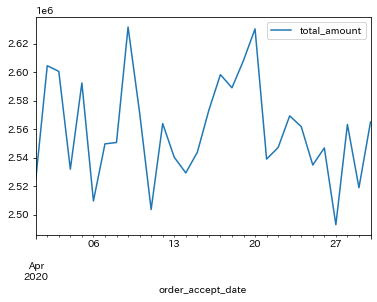

In [10]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

# 25.日付を指定してデータを抽出しよう

In [11]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())
    
date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2020, 4, 8))

6379


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
54466,53065342,95,C26662632,85,79440470,2020-04-08 11:00:00,2020-04-08 11:51:00,0,2252,2,麻生店,KN,神奈川,神奈川,デリバリー,お渡し済み,2020-04-08
54467,8602118,9,C73673754,22,92978169,2020-04-08 11:00:00,2020-04-08 11:20:00,0,4744,2,高島平店,TK,東京,東京,デリバリー,お渡し済み,2020-04-08
54469,86216710,186,C53910592,50,70785599,2020-04-08 11:00:00,2020-04-08 11:35:00,0,2328,2,足利店,TO,北関東,栃木,デリバリー,お渡し済み,2020-04-08
54470,16979078,185,C28441229,20,59747932,2020-04-08 11:00:00,2020-04-08 11:39:00,0,1900,2,守谷店,IB,北関東,茨城,デリバリー,お渡し済み,2020-04-08
54471,53827169,191,C92124871,45,73474499,2020-04-08 11:00:00,2020-04-08 11:35:00,0,5100,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済み,2020-04-08


In [14]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[(order_data['order_date'] >= min_date) & (order_data['order_date'] <= max_date) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())
    
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()
    
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()
    
date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print('最小日付')
display(date_picker_min)

date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print('最大日付')
display(date_picker_max)

最小日付


DatePicker(value=datetime.date(2020, 4, 1))

最大日付


DatePicker(value=datetime.date(2020, 4, 30))

# 26.ストーリーを考えてデータを構築しよう

In [16]:
import os
import glob

current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)


['/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202006.csv',
 '/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202004.csv',
 '/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202005.csv']

In [17]:
order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}: {len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index = True)

/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202006.csv: 233301
/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202004.csv: 233260
/Users/takakiyuuto/Desktop/Machine-learning-100/ch3/tbl_order_202005.csv: 241139


In [19]:
print(len(order_all))
order_all.head()

707700


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,16514392,64,C44271355,49,56527968,2020-06-01 11:00:00,2020-06-01 11:55:00,0,2732,2
1,28342394,12,C98307866,98,46924304,2020-06-01 11:00:00,2020-06-01 11:52:00,0,2064,2
2,29799587,174,C59484037,45,47054474,2020-06-01 11:00:00,2020-06-01 11:25:00,0,3900,2
3,96960753,23,C57278332,70,60848267,2020-06-01 11:00:00,2020-06-01 11:45:00,0,2750,2
4,52147209,7,C36890849,80,20633593,2020-06-01 11:00:00,2020-06-01 11:23:00,0,2328,2


In [24]:
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on='store_id', how='left')
order_all = pd.merge(order_all, m_area, on='area_cd', how='left')

order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'デリバリー'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'お持ち帰り'

order_data.loc[order_data['status'] == 0, 'status_name'] = '受付'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'お支払い済み'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'お渡し済み'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'キャンセル'

order_all.loc[:, 'order_date'] = pd.to_datetime(order_all['order_accept_date']).dt.date

order_all.groupby(['store_id', 'customer_id'])['total_amount'].describe()

count         mean          std     min      25%  \
store_id customer_id                                                     
1        C00244531     14.0  3319.571429   860.262546  1882.0  2515.75   
         C00493736      7.0  3318.142857   922.546915  2471.0  2719.00   
         C01249550      8.0  2664.375000   848.339881  1857.0  2029.75   
         C02241044      6.0  3653.833333  1184.407770  2252.0  2571.00   
         C02859946      9.0  3216.555556   858.216044  1857.0  2647.00   
...                     ...          ...          ...     ...      ...   
196      C84471901     66.0  2781.772727   805.412494   698.0  2255.50   
         C88251581     58.0  3054.465517   984.291289   698.0  2328.00   
         C90878439     73.0  2851.068493   852.860779   698.0  2154.00   
         C97487773     61.0  2988.524590   892.917047   698.0  2238.00   
         C98683987     71.0  2878.042254   913.949458   698.0  2154.00   

                         50%      75%     max  
store_id customer_id                           
1        C00244531    3679.5  3901.00  4462.0  
         C00493736    2987.0  3615.50  5100.0  
         C01249550    2379.5  3132.75  3931.0  
         C02241044    3979.5  4683.75  4692.0  
         C02859946    3586.0  3900.00  3931.0  
...                      ...      ...     ...  
196      C84471901    2677.0  3172.25  4659.0  
         C88251581    2987.0  3891.25  4659.0  
         C90878439    2615.0  3865.00  4659.0  
         C97487773    2750.0  3900.00  4659.0  
         C98683987    2677.0  3530.00  4659.0  

[41336 rows x 8 columns]

#### 売り上げ下位・上位店舗

In [30]:
summary_df = order_all.loc[order_all['status'].isin([1, 2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how='left')

print('売り上げ上位')
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))

print('売り上げ下位')
display(store_summary_df.sort_values('total_amount').head(10))

売り上げ上位


,store_id,total_amount,store_name,area_cd
47,48,11992501,上野店,TK
190,191,11821224,伊勢崎店,GU
122,123,11320012,栄店,KN
67,68,11272728,八王子店,TK
62,63,11201742,西多摩店,TK
126,127,11179377,戸塚店,KN
99,100,11128515,中原店,KN
43,44,11079128,世田谷店,TK
172,173,11001277,戸田店,SA
78,79,10989669,三鷹店,TK


売り上げ下位


,store_id,total_amount,store_name,area_cd
100,101,5350100,宮前店,KN
75,76,5701753,本郷店,TK
2,3,5712210,足立店,TK
151,152,5723229,四街道店,CH
11,12,5808496,西葛西店,TK
195,196,5901819,前橋店,GU
185,186,6087730,足利店,TO
161,162,6158812,越谷店,SA
69,70,6242227,東久留米店,TK
145,146,6307301,成田店,CH


#### キャンセル率上位・下位店舗

In [39]:
cancel_df = pd.DataFrame()

cancel_cnt = order_all.loc[order_all['status'] == 9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status']. isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()

cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df['cancel_rate'] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')

print('キャンセル率が低い')
display(cancel_df.sort_values('cancel_rate').head(10))

print('キャンセル率が高い')
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))


キャンセル率が低い


,store_id,cancel_rate,store_name,area_cd
121,122,16.464415,港北店,KN
130,131,16.641406,我孫子店,CH
119,120,16.702298,金沢店,KN
152,153,17.036115,上尾店,SA
19,20,17.127722,王子店,TK
40,41,17.206367,荻窪店,TK
68,69,17.295981,羽村店,TK
122,123,17.314335,栄店,KN
33,34,17.321016,恵比寿店,TK
181,182,17.322176,那珂店,IB


キャンセル率が高い


,store_id,cancel_rate,store_name,area_cd
7,8,20.305677,板橋店,TK
138,139,20.148791,白井店,CH
131,132,19.948335,市川店,CH
156,157,19.929245,川越店,SA
95,96,19.657880,川崎店,KN
65,66,19.627809,石神井店,TK
75,76,19.534050,本郷店,TK
9,10,19.480519,稲城店,TK
18,19,19.470046,赤羽店,TK
161,162,19.469357,越谷店,SA


# 27.キャンセルの理由を分析してみよう

In [47]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()

order_all.loc[:, 'order_accept_datetime'] = pd.to_datetime(order_all['order_accept_date'])
order_all.loc[:, 'delivered_datetime'] = pd.to_datetime(order_all['delivered_date'])
order_all.loc[:, 'delta'] = order_all[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_df = order_all.loc[(order_all['status'] == 2) & (order_all['store_id'].isin([8, 122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      2860.537975
122    1211.671924
Name: delta, dtype: float64

# 28.仮説を検証してみよう

In [50]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status'] == 2].groupby('store_id')['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,19.026175,昭島店,TK,2063.770950
1,2,18.660150,あきる野店,TK,2090.156472
2,3,18.432286,足立店,TK,2067.716331
3,4,18.320106,北千住店,TK,2069.495935
4,5,18.257150,綾瀬店,TK,2049.123576


In [51]:
temp_chk = check_df[['cancel_rate', 'delta']]
# display()
temp_chk.corr()

,cancel_rate,delta
cancel_rate,1.000000,0.658736
delta,0.658736,1.000000


In [53]:
# キャンセル率が高い店舗（第三四分位数以上）
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[check_df['cancel_rate'] >= th_high]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

# キャンセル率が低い店舗（第一四分位数以上）
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[check_df['cancel_rate'] <= th_low]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.0000,0.7868
delta,0.7868,1.0000


,cancel_rate,delta
cancel_rate,1.000000,0.766384
delta,0.766384,1.000000


In [65]:
import seaborn as sns

# 環境変数
target_store = ''
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

In [111]:
def make_board():
    clear_output()
    display(toggle_db)
    
    pick_order_data = order_all.loc[(order_all['store_name'] == target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date']<= max_date) &(order_all['status'].isin([1, 2]))]
    pick_cancel_data = order_all.loc[(order_all['store_name'] == target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date']<= max_date) &(order_all['status']==9)]
    pick_order_all = order_all.loc[ (order_all['order_date'] >= min_date) & (order_all['order_date']<= max_date) &(order_all['status'].isin([1, 2]))]   
    pick_cancel_all = order_all.loc[ (order_all['order_date'] >= min_date) & (order_all['order_date']<= max_date) &(order_all['status']==9)]        
    
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    
    store_cancel_rate = len(pick_cancel_data) / (len(pick_order_data) + len(pick_cancel_data)) * 100
    
    delivery_time = pick_order_data.loc[pick_order_data['status'] ==2]['delta'].mean()
    delivery_time_all = pick_order_data.loc[pick_order_all['status'] ==2]['delta'].mean()    
    
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:, 'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)
    
    print('=======================================================================')
    
    str_out = f'■■{target_store}■■　【対象期間】: {min_date}〜{max_date}'
    str_out = str_out + f' 【オーダー件数】: {store_o_cnt}件　　【利用顧客数】: {store_c_cnt}件　　'
    
    print(str_out)
    
    print('-----------------------------------------------------------------------------------------------------------------------------')
    
    print('■■■■■　日毎の売り上げ　■■■■■')
    display(temp.resample('D').sum())
    
    print('-----------------------------------------------------------------------------------------------------------------------------')
    
    str_out = f" 【期間売上総額】: {'{:,}'.format(temp['total_amount'].sum())}"
    str_out = str_out + f" 【キャンセル総額】: {'{:,}'.format(pick_cancel_data['total_amount'].sum())}"
    str_out = str_out + f' 【キャンセル率】: {round(store_cancel_rate, 2)} %'
    print(str_out)
    
    str_out = f' 【平均配達完了時間】: {round(delivery_time, 2)}'
    str_out = str_out + f' 【全店舗平均配達完了時間】: {round(delivery_time_all, 2)}'
    print(str_out)
    
    print('-----------------------------------------------------------------------------------------------------------------------------')
    
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title('売上（日単位ヒストグラム）')
    
    sns.countplot(x='order_date', data=pick_cancel_data, ax=ax2)
    ax2.set_title('キャンセル数(日単位)')
    
    fig, (ax) = plt.subplots(1, 1, figsize=(20, 5))
    sns.boxplot(x='order_date', y='total_amount', data=pick_order_data)
    ax.set_title('オーダー状況箱ひげ図')
    
    plt.show()

In [109]:
def change_date_min(val):
    global min_date
    min_date = val['new']
    make_board()
    
def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [105]:
def change_dropdown(val):
    global target_store
    target_store = val['new']
    
    date_picker_min = DatePicker(value=min_date)
    date_picker_min.observe(change_date_min, names='value')
    print('期間')
    
    date_picker_max = DatePicker(value=max_date)
    date_picker_max.observe(change_date_max, names='value')
    
    display(date_picker_min, date_picker_max)

In [106]:
def order_by_area(val):
    clear_output()
    display(toggle_db)
    
    store_list = order_all.loc[order_all['wide_area'] == val['new']]['store_name'].unique()
    
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names='value')
    display(dropdown)

ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

■■宮前店■■　【対象期間】: 2020-04-07〜2020-04-30 【オーダー件数】: 450件　　【利用顧客数】: 210件　　
-----------------------------------------------------------------------------------------------------------------------------
■■■■■　日毎の売り上げ　■■■■■


,total_amount
order_date,
2020-04-07,67197
2020-04-08,62941
2020-04-09,63420
2020-04-10,48790
2020-04-11,51412
2020-04-12,58997
2020-04-13,69103
2020-04-14,47275
2020-04-15,54100


-----------------------------------------------------------------------------------------------------------------------------
 【期間売上総額】: 1,386,939 【キャンセル総額】: 341,236 【キャンセル率】: 19.93 %
 【平均配達完了時間】: 2145.31 【全店舗平均配達完了時間】: 2145.31
-----------------------------------------------------------------------------------------------------------------------------


/Users/takakiyuuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


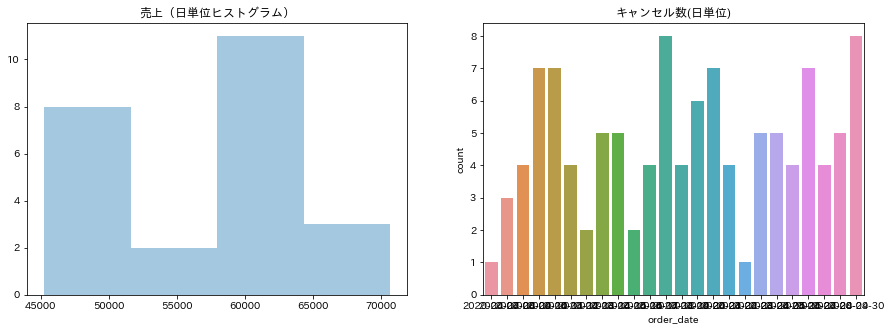

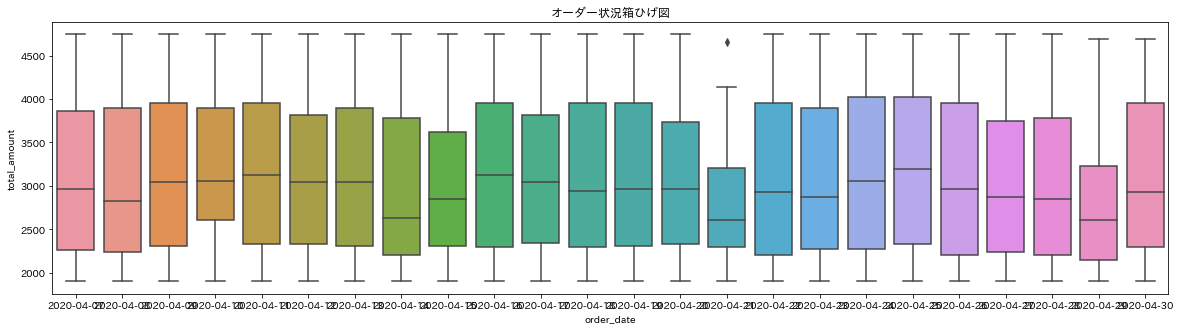

In [112]:
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names='value')
display(toggle_db)

# 30.ダッシュボードを改善しよう

In [116]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]

print('配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝')

print('地域ランキング------------------------')
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])['delta'].mean().sort_values()))

print('地域ごとのTOP5-----------------------')
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd'] == area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

配達時間　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング------------------------


,delta
narrow_area,
茨城,1934.934239
神奈川,2022.413189
東京,2069.447885
群馬,2069.986527
栃木,2072.659933
埼玉,2085.261749
千葉,2096.896375


地域ごとのTOP5-----------------------


,store_name,delta
0,羽村店,1214.262150
1,荻窪店,1218.137222
2,恵比寿店,1218.339984
3,王子店,1231.129261
4,自由が丘店,2039.961415


,store_name,delta
0,金沢店,1208.604427
1,港北店,1214.440518
2,栄店,1218.830287
3,南足柄店,2037.283751
4,高座店,2041.000000


,store_name,delta
0,我孫子店,1201.789091
1,富津店,2032.866799
2,流山店,2036.686813
3,茂原店,2047.481481
4,習志野店,2049.726903


,store_name,delta
0,上尾店,1213.869709
1,入間店,2032.664311
2,坂戸店,2045.206349
3,鴻巣店,2061.013025
4,八潮店,2061.387129


,store_name,delta
0,那珂店,1227.267206
1,日立店,2062.215129
2,守谷店,2065.045108
3,取手店,2067.159451
4,水戸店,2077.228916


,store_name,delta
0,宇都宮店,2044.922142
1,栃木店,2061.107266
2,佐野店,2080.261011
3,足利店,2087.527750
4,小山店,2091.137191


,store_name,delta
0,前橋店,2031.984166
1,太田店,2069.176327
2,伊勢崎店,2073.446099
3,館林店,2073.542633
4,桐生店,2077.139980


In [117]:
base_df = pd.merge(check_df, m_store, on='area_cd')
base_df = pd.merge(base_df, m_area, on='area_cd')

print('キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝')

print('地域ランキング------------------------')
display(pd.DataFrame(base_df.groupby(['narrow_area'])['cancel_rate'].mean().sort_values()))

print('地域ごとのTOP5-----------------------')
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd'] == area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

キャンセル率　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
地域ランキング------------------------


,cancel_rate
narrow_area,
神奈川,18.225274
茨城,18.248213
千葉,18.364046
栃木,18.376046
埼玉,18.442886
東京,18.452096
群馬,18.518733


地域ごとのTOP5-----------------------


,store_name,cancel_rate
0,王子店,17.127722
1,荻窪店,17.206367
2,羽村店,17.295981
3,恵比寿店,17.321016
4,赤坂店,17.354009


,store_name,cancel_rate
0,港北店,16.464415
1,金沢店,16.702298
2,栄店,17.314335
3,愛甲店,17.456758
4,磯子店,17.460317


,store_name,cancel_rate
0,我孫子店,16.641406
1,富津店,17.486877
2,若葉店,17.489948
3,成田店,17.542504
4,佐倉店,17.568072


,store_name,cancel_rate
0,上尾店,17.036115
1,草加店,17.445799
2,大宮店,17.660264
3,和光店,17.781735
4,川口店,17.856058


,store_name,cancel_rate
0,那珂店,17.322176
1,守谷店,17.326449
2,日立店,18.262458
3,取手店,18.549312
4,水戸店,18.945312


,store_name,cancel_rate
0,足利店,17.451062
1,宇都宮店,17.847114
2,小山店,18.770546
3,栃木店,18.896165
4,佐野店,18.915344


,store_name,cancel_rate
0,伊勢崎店,17.753322
1,高崎店,17.963895
2,太田店,18.376494
3,桐生店,18.761931
4,前橋店,18.802732
